<a href="https://colab.research.google.com/github/AIME1995/AIME1995/blob/main/BANQUE_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse des données des clients d'une banque

Importons les libraries nécessaires et les données pour l'étude.

In [5]:
# import librairie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

In [115]:
# import de la base des données
data = pd.read_csv("bank-full.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Description des variables
À propos de l'ensemble de données
données clients bancaires :

1 **``âge (numérique)``**

2 **emploi** : type d'emploi (catégorique : 'admin.', 'ouvrier', 'entrepreneur', 'femme de ménage', 'gestion', 'retraité', 'indépendant', 'services', 'étudiant' ,'technicien','chômeur','inconnu')

3 **matrimonial** : état civil (catégorique : 'divorcé', 'marié', 'célibataire', 'inconnu' ; note : 'divorcé' signifie divorcé ou veuf)

4 **éducation (catégorique **: 'de base.4a', 'de base.6a', 'de base.9a', 'lycée', 'analphabète', 'cours.professionnel', 'diplôme.universitaire', 'inconnu')

5 **défaut** : le crédit est-il en défaut ? (catégorique : "non", "oui", "inconnu")

6 **logement** : a-t-il un prêt logement ? (catégorique : "non", "oui", "inconnu")
7 – prêt : a-t-il un prêt personnel ? (catégorique : "non", "oui", "inconnu")
lié au dernier contact de la campagne en cours :

8 **contact** : type de communication du contact (catégorique : 'cellulaire', 'téléphone')

9 **mois** : mois du dernier contact de l'année (catégorique : 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 **day_of_week**: dernier jour de contact de la semaine (catégorique : 'lundi', 'mardi', 'mercredi', 'jeu', 'ven')

11 **durée** : durée du dernier contact, en secondes (numérique). Remarque importante : cet attribut affecte fortement la cible de sortie (par exemple, si durée=0 alors y='no'). Cependant, la durée n'est pas connue avant qu'un appel soit effectué. De plus, après la fin de l'appel, y est évidemment connu. Ainsi, cette donnée ne doit être incluse qu’à des fins de référence et doit être écartée si l’intention est d’avoir un modèle prédictif réaliste.

``autres attributs :``
12 **campagne** : nombre de contacts effectués lors de cette campagne et pour ce client (numérique, inclut le dernier contact)
13 **pdays** : nombre de jours écoulés après que le client a été contacté pour la dernière fois lors d'une campagne précédente (numérique ; 999 signifie que le client n'a pas été contacté auparavant)

14 **précédent** : nombre de contacts effectués avant cette campagne et pour ce client (numérique)

15 **poutcome** : résultat de la campagne marketing précédente (catégorique : 'échec', 'inexistant', 'succès')

attributs du contexte social et économique
16 **emp.var.rate** : taux de variation de l'emploi - indicateur trimestriel (numérique)

17 **cons.price.idx** : indice des prix à la consommation - indicateur mensuel (numérique)

18 **cons.conf.idx** : indice de confiance des consommateurs - indicateur mensuel (numérique)

19 **euribor3m** : taux euribor 3 mois - indicateur journalier (numérique)

20 **nr.employed** : nombre d'employés - indicateur trimestriel (numérique)

21 **y** - le client a-t-il souscrit un dépôt à terme ? (binaire : 'oui', 'non')

In [15]:
# dimension de la base des données
data.shape

(41188, 21)

In [159]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [160]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [162]:
subset = ['age', 'job', 'marital', 'education','default', 'housing', 'loan', 'contact','duration', 'campaign']
data[data.duplicated(subset=subset)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1179,44,technician,married,professional.course,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4030,32,admin.,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
4348,45,blue-collar,married,basic.9y,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
5581,45,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40110,33,admin.,single,university.degree,no,yes,no,cellular,jul,mon,...,1,999,1,failure,-1.7,94.215,-40.3,0.827,4991.6,no
40114,73,retired,married,basic.4y,no,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,-1.7,94.215,-40.3,0.835,4991.6,yes
40248,29,admin.,single,university.degree,no,yes,no,cellular,jul,mon,...,2,999,1,failure,-1.7,94.215,-40.3,0.889,4991.6,no
40264,32,admin.,single,university.degree,no,yes,no,cellular,jul,tue,...,1,999,1,failure,-1.7,94.215,-40.3,0.893,4991.6,no


In [163]:
data = data.drop_duplicates(subset=subset)

In [164]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [165]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41084.000000,41084.000000,41084.000000,41084.000000,41084.000000,41084.000000,41084.000000,41084.000000,41084.000000,41084.000000
mean,40.030839,258.555326,2.570806,962.479457,0.172792,0.084237,93.576388,-40.502105,3.623742,5167.130630
std,10.422018,259.512223,2.772597,186.901635,0.494852,1.570014,0.578643,4.625370,1.733605,72.206078
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [167]:
data.shape

(41084, 21)

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41084 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41084 non-null  int64  
 1   job             41084 non-null  object 
 2   marital         41084 non-null  object 
 3   education       41084 non-null  object 
 4   default         41084 non-null  object 
 5   housing         41084 non-null  object 
 6   loan            41084 non-null  object 
 7   contact         41084 non-null  object 
 8   month           41084 non-null  object 
 9   day_of_week     41084 non-null  object 
 10  duration        41084 non-null  int64  
 11  campaign        41084 non-null  int64  
 12  pdays           41084 non-null  int64  
 13  previous        41084 non-null  int64  
 14  poutcome        41084 non-null  object 
 15  emp.var.rate    41084 non-null  float64
 16  cons.price.idx  41084 non-null  float64
 17  cons.conf.idx   41084 non-null 

In [169]:
# les cinq premiers age de la base des données clients
age = data['age'].head()
age

0    56
1    57
2    37
3    40
4    56
Name: age, dtype: int64

In [171]:
# sélectionnaons plusieurs colones
filtre = data[["age", "subscribed", "loan", "marital"]]
filtre.tail()


,age,subscribed,loan,marital
41183,73,yes,no,married
41184,46,no,no,married
41185,56,no,no,married
41186,44,yes,no,married
41187,74,no,no,married


In [172]:
# identifier les Na
data.isnull().value_counts()

age    job    marital  education  default  housing  loan   contact  month  day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed
False  False  False    False      False    False    False  False    False  False        False     False     False  False     False     False         False           False          False      False        False         41084
dtype: int64

In [173]:
services = data[data['job']=="services"]
services.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [174]:
# nombre de statut matrimonial
print(data['marital'].value_counts())

married     24859
single      11534
divorced     4611
unknown        80
Name: marital, dtype: int64


In [175]:
# filtrage
filtre = (data['age'] > 30) & (data['marital'] == "single")
data[filtre]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
19,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
22,55,retired,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23,41,technician,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
28,54,technician,single,university.degree,unknown,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
42,38,admin.,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41148,35,admin.,single,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.040,4963.6,yes
41155,31,housemaid,single,university.degree,no,no,no,telephone,nov,mon,...,5,999,0,nonexistent,-1.1,94.767,-50.8,1.039,4963.6,no
41157,31,housemaid,single,university.degree,no,no,no,cellular,nov,mon,...,4,999,0,nonexistent,-1.1,94.767,-50.8,1.039,4963.6,no
41172,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes


In [176]:
# Grouper les données
data.groupby(["job", "marital"])["age"].mean()

job            marital 
admin.         divorced    43.282031
               married     40.318547
               single      33.654824
               unknown     35.785714
blue-collar    divorced    42.840659
               married     40.893876
               single      33.346491
               unknown     41.571429
entrepreneur   divorced    44.106145
               married     42.527544
               single      35.492611
               unknown     34.000000
housemaid      divorced    49.621118
               married     45.745174
               single      38.462185
               unknown     40.000000
management     divorced    46.190332
               married     43.759233
               single      33.993988
               unknown     51.000000
retired        divorced    64.456897
               married     61.833202
               single      55.521739
               unknown     61.000000
self-employed  divorced    42.751880
               married     42.230088
              

## **Profil client** :

Répartition de la clientèle par âge, état civil, niveau d'éducation, emploi, etc.
Quel est le profil type des clients qui souscrivent à un dépôt à terme ? Y a-t-il une corrélation avec l'âge, l'éducation, l'emploi, etc. ?

In [177]:
# la répartition des clients par caratéristique
#age
profil_age = data['age'].value_counts()
profil_age

31    1941
32    1833
33    1827
36    1775
35    1756
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

In [178]:
data.groupby(["marital", "education"])["age"].mean()


marital   education          
divorced  basic.4y               54.844581
          basic.6y               44.461538
          basic.9y               41.994690
          high.school            42.690436
          illiterate             42.000000
          professional.course    43.589041
          university.degree      44.735976
          unknown                47.967914
married   basic.4y               47.983846
          basic.6y               41.011898
          basic.9y               40.770828
          high.school            40.654503
          illiterate             49.200000
          professional.course    42.137591
          university.degree      41.387720
          unknown                47.385932
single    basic.4y               36.933775
          basic.6y               35.255193
          basic.9y               32.383270
          high.school            31.903339
          illiterate             51.000000
          professional.course    33.938603
          university.deg

In [55]:
# education
education = data['education'].value_counts()
education

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [57]:
# emploi
emploi = data['job'].value_counts()
emploi

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [59]:
# marital
marier = data['marital'].value_counts()
marier

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [89]:
# les clients qui ont souscri a un dépot à term
subscribed = data[data['subscribed'] == "yes"]
subscribed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [67]:
subscribed['age'].corr(data['cons.price.idx'])

-0.024694730899369906

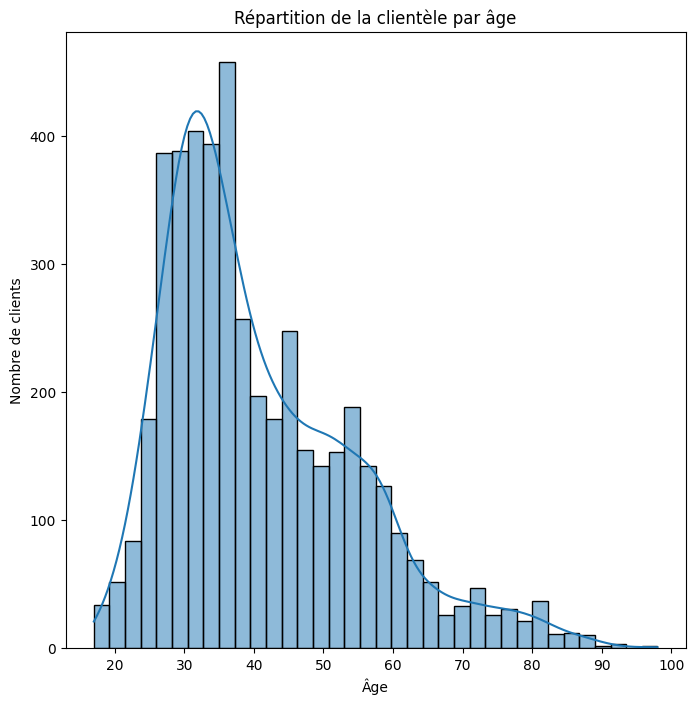

In [179]:
# visuaalisation graphique age
plt.figure(figsize=(8, 8))
sns.histplot(subscribed['age'], kde = True)
plt.title('Répartition de la clientèle par âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.show()

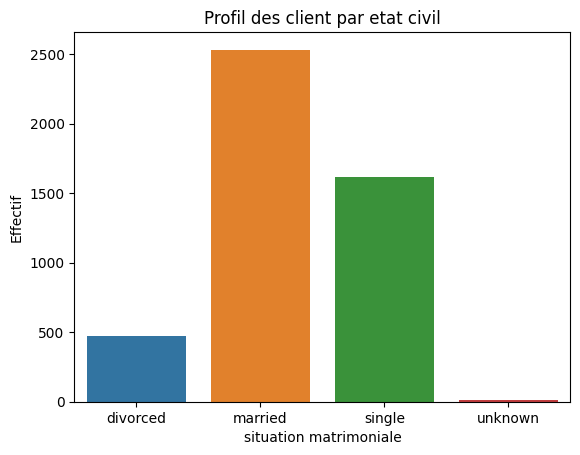

In [203]:
# visualisation graphique
sns.countplot(x="marital", data = subscribed)
plt.xlabel("situation matrimoniale")
plt.ylabel("Effectif")
plt.title("Profil des client par etat civil")
plt.show()

In [197]:
data['marital'].value_counts()

married     24859
single      11534
divorced     4611
unknown        80
Name: marital, dtype: int64

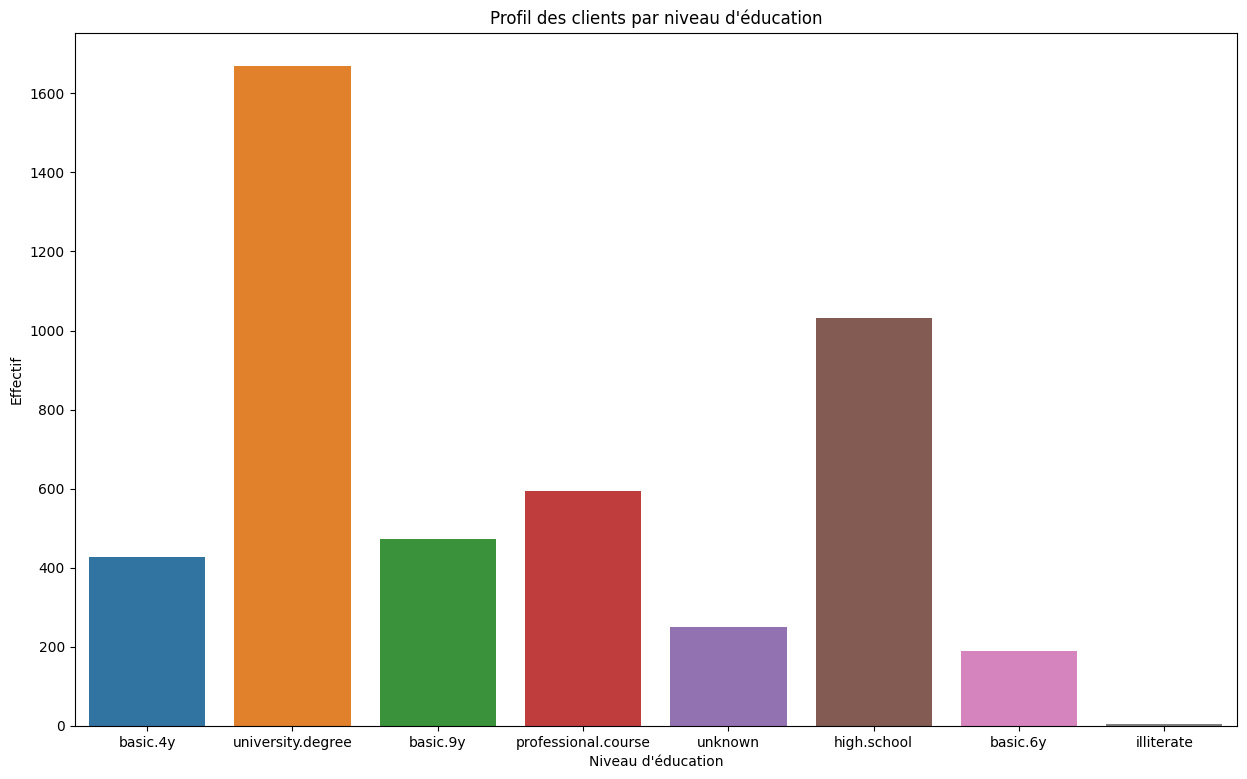

In [204]:
# education
plt.figure(figsize=(15,9))
sns.countplot(x = "education", data=subscribed)
plt.xlabel("Niveau d'éducation")
plt.ylabel("Effectif")
plt.title("Profil des clients par niveau d'éducation")
plt.show()

In [182]:
## grouper les souscriptions par profile
subscribed.groupby('job').mean("age")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,37.968935,517.414201,2.058432,773.512574,0.510355,-1.383210,93.319537,-39.545488,1.965078,5087.736760
blue-collar,39.200627,732.673981,2.156740,899.324451,0.269592,-0.487774,93.491480,-41.770846,2.915715,5139.410658
entrepreneur,41.935484,667.540323,2.064516,910.943548,0.250000,-0.745161,93.381153,-40.895161,2.818839,5134.504839
housemaid,52.650943,535.537736,1.896226,727.367925,0.575472,-1.437736,93.350934,-38.311321,1.908717,5080.316981
management,42.783537,543.804878,2.030488,786.929878,0.533537,-1.230793,93.306631,-39.456402,2.232896,5100.271037
retired,68.253456,420.235023,1.942396,712.937788,0.668203,-1.926267,93.245629,-37.542857,1.348569,5051.795392
self-employed,38.006711,622.020134,2.114094,878.859060,0.315436,-1.173154,93.288470,-40.377852,2.282242,5108.494631
services,36.077399,634.851393,2.232198,854.479876,0.365325,-0.743034,93.456598,-40.866873,2.631139,5121.504954
student,24.800000,403.316364,1.810909,656.116364,0.807273,-2.007636,93.289771,-38.957091,1.176313,5045.426182


In [183]:
subscribed['marital'].value_counts()

married     2532
single      1620
divorced     476
unknown       12
Name: marital, dtype: int64

In [184]:
subscribed[['education']].value_counts()

education          
university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
dtype: int64

In [200]:
# tableau des profils des clients
tableau_profil = pd.pivot_table(
    data, index=["marital", "education"],
    columns="job",
    aggfunc="size",
    fill_value=0
    )

tableau_profil

job                           admin.  blue-collar  entrepreneur  housemaid  \
marital  education                                                           
divorced basic.4y                  4          193             7         68   
         basic.6y                 16           82             4         14   
         basic.9y                 76          286            18         16   
         high.school             439           71            43         27   
         illiterate                0            0             0          0   
         professional.course      49           35            15         11   
         university.degree       671            2            82         16   
         unknown                  25           59            10          9   
married  basic.4y                 60         1824           124        383   
         basic.6y                106         1134            63         62   
         basic.9y                286         2568           166         68   
         high.school            1716          457           160        117   
         illiterate                1            7             2          1   
         professional.course     207          335           100         34   
         university.degree      2707           31           414         85   
         unknown                 147          306            42         27   
single   basic.4y                 13          290             6         22   
         basic.6y                 29          205             4          1   
         basic.9y                137          751            26         10   
         high.school            1167          347            30         30   
         illiterate                0            1             0          0   
         professional.course     106           83            20         14   
         university.degree      2327           61           112         36   
         unknown                  77           86             5          6   
unknown  basic.4y                  0            3             0          1   
         basic.6y                  0            3             0          0   
         basic.9y                  0            3             0          0   
         high.school               1            3             1          0   
         professional.course       1            0             0          0   
         university.degree        12            0             2          2   
         unknown                   0            2             0          0   

job                           management  retired  self-employed  services  \
marital  education                                                           
divorced basic.4y                      6      151              5        26   
         basic.6y                     10        8              1        39   
         basic.9y                      9       19             20        54   
         high.school                  36       51             12       349   
         illiterate                    0        2              0         0   
         professional.course          14       51             23        27   
         university.degree           244       57             68        20   
         unknown                      12        9              4        17   
married  basic.4y                     85      427             77        88   
         basic.6y                     74       59             19       137   
         basic.9y                    123      117            179       229   
         high.school                 216      204             72      1551   
         illiterate                    0        1              3         0   
         professional.course          62      177            111       125   
         university.degree          1427      202            426        73   
         unknown                      98       84             17        88   
single   basic.4y    

## **Impact des campagnes marketing :**

Quel est l'impact du nombre de contacts lors d'une campagne sur la souscription aux dépôts à terme ?

Le résultat de la campagne précédente influence-t-il les souscriptions actuelles ?

In [185]:
data.groupby('subscribed').sum()

<ipython-input-185-f506996f5726>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
subscribed,,,,,,,,,,
no,1455117,8057458,96106,35872462,4819,9168.9,3411981.092,-1479666.0,139034.881,188680438.6
yes,189510,2565029,9513,3670044,2280,-5708.1,432511.222,-184322.5,9842.940,23605956.2


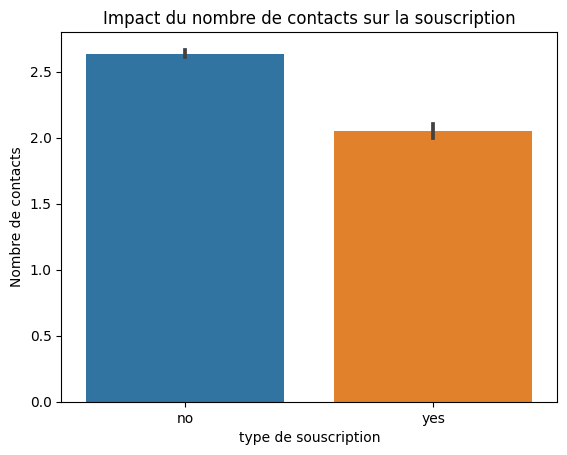

In [186]:
# Impact du nombre de contact sur la subscription
sns.barplot(x='subscribed', y ='campaign', data=data)
plt.ylabel('Nombre de contacts')
plt.xlabel('type de souscription')
plt.title('Impact du nombre de contacts sur la souscription')
plt.show()

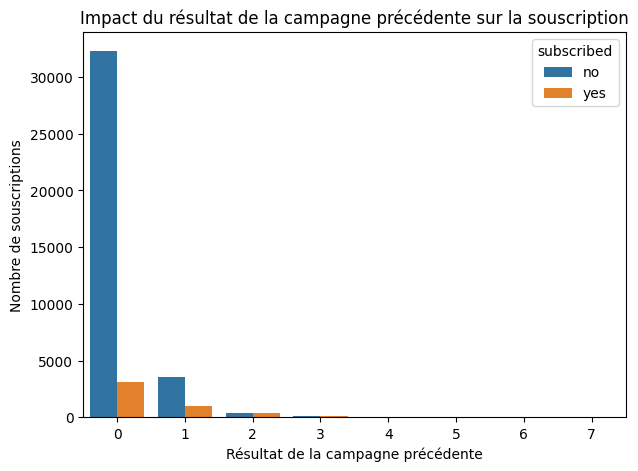

In [208]:
# taux de souscription sur le nombre d'abonné
plt.figure(figsize=(7, 5))
sns.countplot(x='previous', hue="subscribed", data=data)
plt.xlabel('Résultat de la campagne précédente')
plt.ylabel('Nombre de souscriptions')
plt.title('Impact du résultat de la campagne précédente sur la souscription')
plt.show()

## **Comportement lors des contacts :**

Durée des contacts : est-ce que la durée a une influence sur la souscription ?
Jours écoulés depuis le dernier contact : y a-t-il une corrélation entre ce laps de temps et la souscription ?

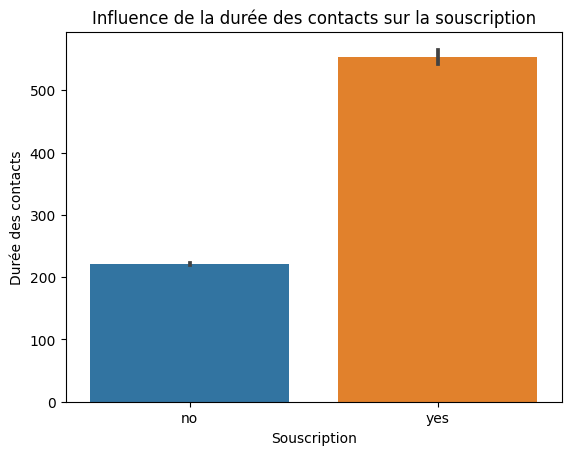

In [210]:
#Influence de la durée des contacts sur la souscription
sns.barplot(x="subscribed", y ="duration", data=data)
plt.xlabel('Souscription')
plt.ylabel('Durée des contacts')
plt.title('Influence de la durée des contacts sur la souscription')
plt.show()

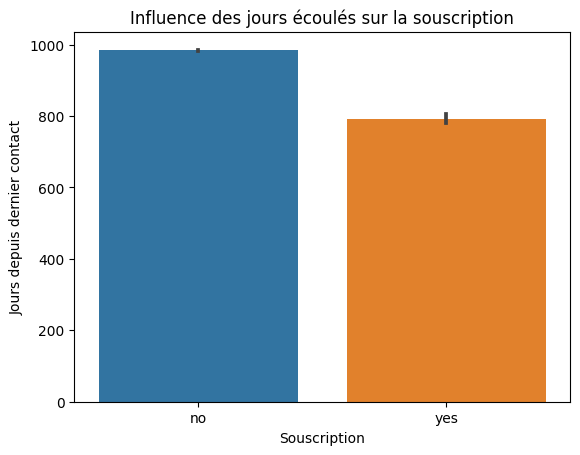

In [189]:
# Influence de la durée des jours qui séparent les contacts sur la souscription
sns.barplot(x="subscribed", y="pdays", data=data)
plt.xlabel('Souscription')
plt.ylabel('Jours depuis dernier contact')
plt.title('Influence des jours écoulés sur la souscription')
plt.show()

##**Contexte économique et social :**

Comment les indicateurs économiques (taux de variation de l'emploi, indice des prix, etc.) influencent-ils les souscriptions ?
Y a-t-il une variation dans les souscriptions en fonction des variations économiques ?

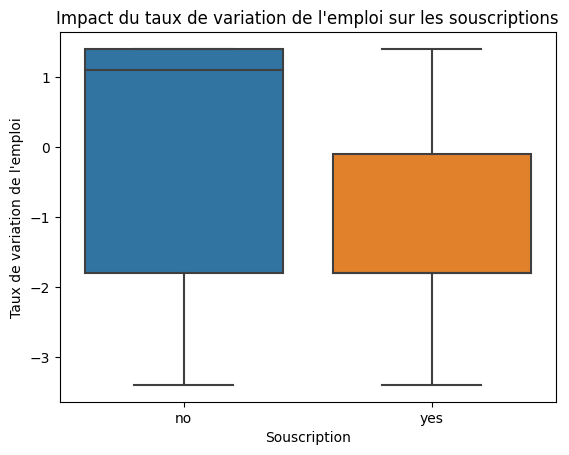

In [190]:
# Visualisation de l'impact du taux de variation de l'emploi sur les souscriptions
sns.boxplot(x="subscribed", y="emp.var.rate", data=data)
plt.xlabel('Souscription')
plt.ylabel('Taux de variation de l\'emploi')
plt.title('Impact du taux de variation de l\'emploi sur les souscriptions')
plt.show()


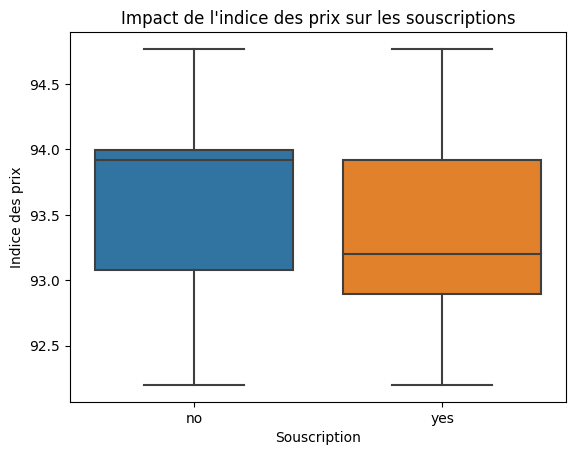

In [191]:

# Visualisation de l'impact de l'indice des prix sur les souscriptions
sns.boxplot(x="subscribed", y="cons.price.idx", data=data)
plt.xlabel('Souscription')
plt.ylabel('Indice des prix')
plt.title('Impact de l\'indice des prix sur les souscriptions')
plt.show()

## **Impact des prêts et des défauts de paiement :**

Relation entre les souscriptions et les prêts logement/personnels ou les défauts de crédit.


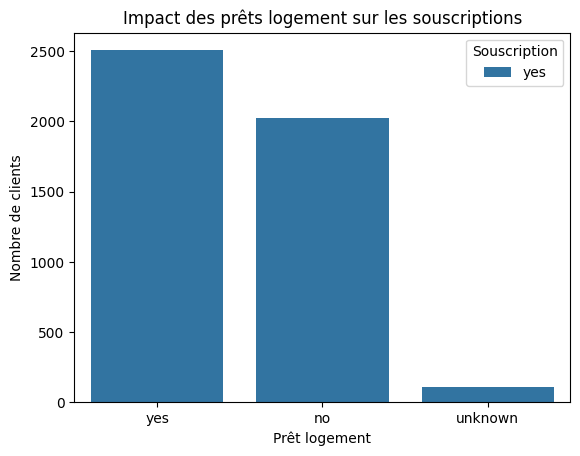

In [192]:
# Impact des prêts logement sur les souscriptions
sns.countplot(x="housing", hue="subscribed", data=subscribed)
plt.xlabel('Prêt logement')
plt.ylabel('Nombre de clients')
plt.title('Impact des prêts logement sur les souscriptions')
plt.legend(title='Souscription', loc='upper right')
plt.show()

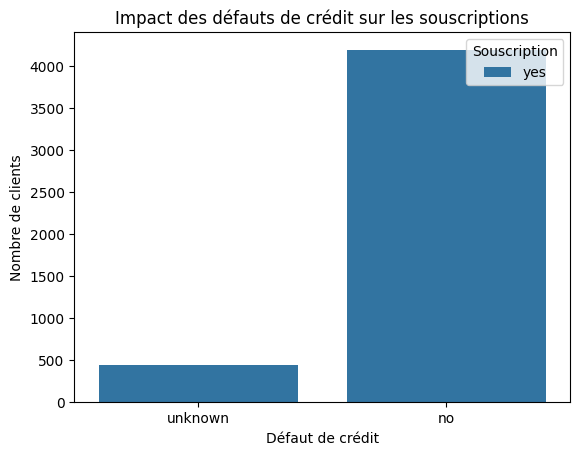

In [193]:
# Impact des défauts de crédit sur les souscriptions
sns.countplot(x="default", hue="subscribed", data=subscribed)
plt.xlabel('Défaut de crédit')
plt.ylabel('Nombre de clients')
plt.title('Impact des défauts de crédit sur les souscriptions')
plt.legend(title='Souscription', loc='upper right')
plt.show()

## **Période de contact :**

Est-ce que le jour de la semaine ou le mois de contact a une incidence sur les souscriptions ?

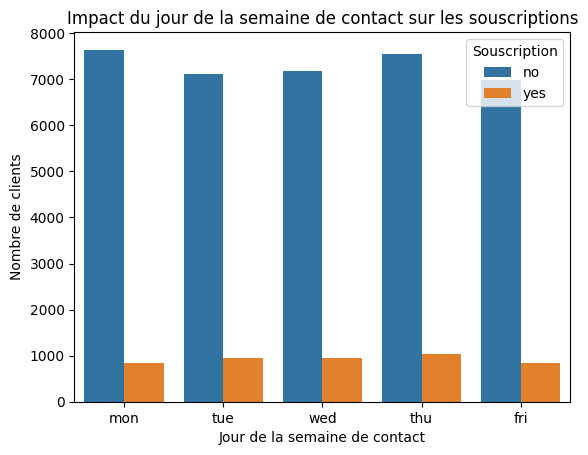

In [194]:
# Diagramme en barres pour le jour de la semaine
sns.countplot(x="day_of_week", hue="subscribed", data=data)
plt.xlabel('Jour de la semaine de contact')
plt.ylabel('Nombre de clients')
plt.title('Impact du jour de la semaine de contact sur les souscriptions')
plt.legend(title='Souscription', loc='upper right')
plt.show()


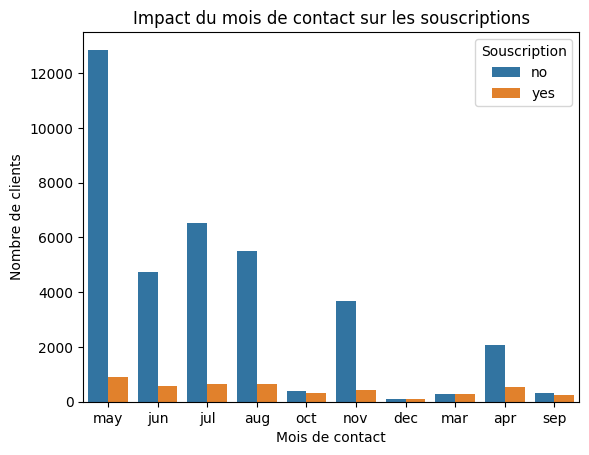

In [195]:
# Diagramme en barres pour le mois de contact
sns.countplot(x="month", hue="subscribed", data=data)
plt.xlabel('Mois de contact')
plt.ylabel('Nombre de clients')
plt.title('Impact du mois de contact sur les souscriptions')
plt.legend(title='Souscription', loc='upper right')
plt.show()
